# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-solid-state-qubit-candidates/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Insightful summary"
InsertApproach = "03-insightful-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_ael_shear_modulus_vrh,AFLOWML|ml_agl_debye,AFLOWML|ml_agl_heat_capacity_Cp_300K,AFLOWML|ml_agl_heat_capacity_Cp_300K_per_atom,AFLOWML|ml_agl_heat_capacity_Cv_300K,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,AFLOWML|ml_egap_type_Insulator,candidate
0,mvc-12905,Fe4O8,3.0,26,-0.295049,3.0,26,-0.295049,0.040992,0.067233,...,74.980,559.793,29.522,2.614,29.011,2.488,2.762,0.000060,1,0.0
1,mp-24,C8,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,490.162,2012.191,4.036,0.679,4.262,0.634,3.043,0.000086,1,1.0
2,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,521.822,2076.203,1.740,0.629,1.816,0.588,3.223,0.000086,1,1.0
3,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,505.647,2070.786,1.149,0.658,1.139,0.617,4.279,0.000086,1,1.0
4,mp-149,Si2,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,49.213,560.299,5.108,2.666,4.739,2.577,3.417,0.000061,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,58.263,362.421,122.952,2.800,118.318,2.709,2.690,0.000052,1,0.0
586,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,81.354,521.151,51.377,2.650,53.364,2.515,2.749,0.000060,0,0.0
587,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,82.942,521.152,64.432,2.666,63.321,2.496,2.841,0.000060,0,0.0
588,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,72.603,505.797,34.850,2.733,35.375,2.654,2.725,0.000061,0,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(24614, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
15385,mp-630227,C60,C,0.0,0.451455,0.0,0.000000,0.0,0.416667,0.0,0.235940
16153,mp-667273,C60,C,1.0,0.885980,0.0,0.000000,1.0,0.566889,0.0,0.402957
16406,mp-680372,C60,C,0.0,0.301325,0.0,0.000000,0.0,0.416667,0.0,0.114960
16481,mp-683919,C140,C,0.0,0.361349,0.0,0.000000,0.0,0.400000,0.0,0.006622
21329,mp-1194362,C28,C,0.0,0.044105,0.0,0.018587,0.0,0.406667,0.0,0.015339
22128,mp-1196583,C240,C,1.0,0.742873,0.0,0.000000,0.0,0.340000,0.0,0.002150
24102,mp-1203645,C48,C,0.0,0.029685,1.0,1.000000,0.0,0.446667,0.0,0.007918
24551,mp-1205417,C20,C,1.0,0.791322,0.0,0.018587,0.0,0.240000,0.0,0.005820


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
44,mp-344,B4N4,BN,0.0,0.415377,1.0,0.888889,1.0,0.709629,1.0,0.978667
238,mp-1599,B4N4,BN,0.0,0.300862,1.0,1.000000,0.0,0.380000,1.0,0.826926
241,mp-1639,B1N1,BN,1.0,0.999849,1.0,0.959459,1.0,0.948741,1.0,0.997104
385,mp-2653,B2N2,BN,1.0,0.999102,1.0,0.959459,1.0,0.918741,1.0,0.997153
3088,mp-13151,B4N4,BN,1.0,0.997842,1.0,0.888889,1.0,0.828186,1.0,0.989109
5149,mp-20305,In1As1,InAs,1.0,0.885286,0.0,0.000000,0.0,0.467354,0.0,0.046610
15781,mp-644751,B4N4,BN,1.0,0.983688,1.0,0.888889,1.0,0.594297,0.0,0.360867
19246,mp-1077506,B3N3,BN,1.0,0.704841,1.0,0.888889,1.0,0.564560,1.0,0.680042


In [10]:
atleast_one_model = Summary[(Summary["RF "] == 1) | 
                       (Summary["DT "] == 1) |
                       (Summary["GB "] == 1) | 
                       (Summary["LOG "] == 1)]

atleast_one_model.to_csv(models_dir / InsertApproach / "summary" / "atleast_one_model.csv")
atleast_one_model

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mp-7,S6,S,1.0,0.565579,0.0,0.400000,1.0,0.582498,1.0,0.981286
1,mp-14,Se3,Se,1.0,0.828285,1.0,0.959459,1.0,0.509082,0.0,0.477802
2,mp-19,Te3,Te,1.0,0.779311,1.0,0.959459,0.0,0.393814,0.0,0.016574
3,mp-25,N8,N2,1.0,0.938873,0.0,0.400000,1.0,0.635309,1.0,0.979579
4,mp-77,S32,S,1.0,0.589078,0.0,0.018587,0.0,0.404897,0.0,0.471047
...,...,...,...,...,...,...,...,...,...,...,...
24375,mp-1204768,Li8B48H132N28,Li2B12H33N7,0.0,0.012576,1.0,1.000000,0.0,0.310000,1.0,0.577726
24392,mp-1204824,Li4B4H32N8,LiB(H4N)2,0.0,0.035432,1.0,1.000000,0.0,0.290000,1.0,0.622952
24512,mp-1205326,Tb7Pt1I12,Tb7PtI12,0.0,0.059016,0.0,0.018587,0.0,0.295357,1.0,0.982325
24551,mp-1205417,C20,C,1.0,0.791322,0.0,0.018587,0.0,0.240000,0.0,0.005820


## How many entries does the models agree on? 

In [11]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
7,mp-111,Ne1,Ne,1.0,0.999798,1.0,0.959459,1.0,0.745883,1.0,0.951905
10,mp-147,Se6,Se,1.0,0.504307,1.0,0.959459,1.0,0.530367,1.0,0.945426
15,mp-189,Si4Ru4,SiRu,1.0,0.573611,1.0,0.959459,1.0,0.728828,1.0,0.980514
27,mp-252,Be1Te1,BeTe,1.0,0.802676,1.0,0.959459,1.0,0.751246,1.0,0.955263
135,mp-938,Ge1Te1,GeTe,1.0,0.604092,1.0,0.959459,1.0,0.513228,1.0,0.865103
...,...,...,...,...,...,...,...,...,...,...,...
19823,mp-1104073,C11N4,C11N4,1.0,0.977754,1.0,0.888889,1.0,0.743900,1.0,0.525345
19844,mp-1104326,Ho2V2O8,HoVO4,1.0,1.000000,1.0,1.000000,1.0,0.571538,1.0,0.997603
19978,mp-1105655,C12N8,C3N2,1.0,0.886587,1.0,0.888889,1.0,0.608560,1.0,0.680552
20546,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.000000,1.0,0.540556,1.0,0.653684


In [12]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
147,mp-1039,Mg2Te2,MgTe,1.0,0.944340,1.0,0.959459,1.0,0.841810,1.0,0.969075
151,mp-1070,Cd2Se2,CdSe,1.0,0.866993,1.0,0.959459,1.0,0.819085,1.0,0.978501
217,mp-1479,B1P1,BP,1.0,0.928663,1.0,0.959459,1.0,0.809424,1.0,0.989105
241,mp-1639,B1N1,BN,1.0,0.999849,1.0,0.959459,1.0,0.948741,1.0,0.997104
385,mp-2653,B2N2,BN,1.0,0.999102,1.0,0.959459,1.0,0.918741,1.0,0.997153
862,mp-4524,Zn2Ge2P4,ZnGeP2,1.0,0.900909,1.0,0.959459,1.0,0.831389,1.0,0.997298
3066,mp-13033,Mg1Te1,MgTe,1.0,0.928348,1.0,0.959459,1.0,0.802498,1.0,0.958575
3088,mp-13151,B4N4,BN,1.0,0.997842,1.0,0.888889,1.0,0.828186,1.0,0.989109
8227,mp-30148,B2C4N2,BC2N,1.0,0.998454,1.0,0.888889,1.0,0.908186,1.0,0.990301
15381,mp-629458,B1C2N1,BC2N,1.0,0.998428,1.0,0.959459,1.0,0.948741,1.0,0.995945


In [13]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
7,mp-111,Ne1,Ne,1.0,0.999798,1.0,0.959459,1.0,0.745883,1.0,0.951905
10,mp-147,Se6,Se,1.0,0.504307,1.0,0.959459,1.0,0.530367,1.0,0.945426
13,mp-160,B12,B,0.0,0.385283,1.0,0.888889,1.0,0.814860,1.0,0.765732
15,mp-189,Si4Ru4,SiRu,1.0,0.573611,1.0,0.959459,1.0,0.728828,1.0,0.980514
27,mp-252,Be1Te1,BeTe,1.0,0.802676,1.0,0.959459,1.0,0.751246,1.0,0.955263
...,...,...,...,...,...,...,...,...,...,...,...
19844,mp-1104326,Ho2V2O8,HoVO4,1.0,1.000000,1.0,1.000000,1.0,0.571538,1.0,0.997603
19978,mp-1105655,C12N8,C3N2,1.0,0.886587,1.0,0.888889,1.0,0.608560,1.0,0.680552
20546,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.000000,1.0,0.540556,1.0,0.653684
21205,mp-1193675,B28,B,0.0,0.289607,1.0,0.888889,1.0,0.777860,1.0,0.705412


In [14]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
13,mp-160,B12,B,0.0,0.385283,1.0,0.888889,1.0,0.814860,1.0,0.765732
27,mp-252,Be1Te1,BeTe,1.0,0.802676,1.0,0.959459,1.0,0.751246,1.0,0.955263
147,mp-1039,Mg2Te2,MgTe,1.0,0.944340,1.0,0.959459,1.0,0.841810,1.0,0.969075
151,mp-1070,Cd2Se2,CdSe,1.0,0.866993,1.0,0.959459,1.0,0.819085,1.0,0.978501
217,mp-1479,B1P1,BP,1.0,0.928663,1.0,0.959459,1.0,0.809424,1.0,0.989105
241,mp-1639,B1N1,BN,1.0,0.999849,1.0,0.959459,1.0,0.948741,1.0,0.997104
385,mp-2653,B2N2,BN,1.0,0.999102,1.0,0.959459,1.0,0.918741,1.0,0.997153
390,mp-2691,Cd1Se1,CdSe,1.0,0.894029,1.0,0.959459,1.0,0.796525,1.0,0.972799
862,mp-4524,Zn2Ge2P4,ZnGeP2,1.0,0.900909,1.0,0.959459,1.0,0.831389,1.0,0.997298
1061,mp-5213,Cd2Sn2P4,CdSnP2,1.0,0.541474,1.0,0.959459,1.0,0.759743,1.0,0.985203


In [15]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mp-7,S6,S,1.0,0.565579,0.0,0.400000,1.0,0.582498,1.0,0.981286
3,mp-25,N8,N2,1.0,0.938873,0.0,0.400000,1.0,0.635309,1.0,0.979579
7,mp-111,Ne1,Ne,1.0,0.999798,1.0,0.959459,1.0,0.745883,1.0,0.951905
10,mp-147,Se6,Se,1.0,0.504307,1.0,0.959459,1.0,0.530367,1.0,0.945426
11,mp-154,N8,N2,1.0,0.929649,0.0,0.400000,1.0,0.621218,1.0,0.927926
...,...,...,...,...,...,...,...,...,...,...,...
20546,mp-1190284,Bi8Se9,Bi8Se9,1.0,1.000000,1.0,1.000000,1.0,0.540556,1.0,0.653684
21205,mp-1193675,B28,B,0.0,0.289607,1.0,0.888889,1.0,0.777860,1.0,0.705412
21838,mp-1195735,Te24As16,Te3As2,0.0,0.118644,0.0,0.000000,1.0,0.570087,1.0,0.976444
22083,mp-1196461,C156F84,C13F7,0.0,0.001809,0.0,0.400000,1.0,0.566632,1.0,0.976362


In [16]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mp-7,S6,S,1.0,0.565579,0.0,0.400000,1.0,0.582498,1.0,0.981286
1,mp-14,Se3,Se,1.0,0.828285,1.0,0.959459,1.0,0.509082,0.0,0.477802
2,mp-19,Te3,Te,1.0,0.779311,1.0,0.959459,0.0,0.393814,0.0,0.016574
3,mp-25,N8,N2,1.0,0.938873,0.0,0.400000,1.0,0.635309,1.0,0.979579
4,mp-77,S32,S,1.0,0.589078,0.0,0.018587,0.0,0.404897,0.0,0.471047
...,...,...,...,...,...,...,...,...,...,...,...
23688,mp-1202132,Sr5Ti7O19,Sr5Ti7O19,1.0,1.000000,0.0,0.018587,0.0,0.300000,0.0,0.005020
23946,mp-1203087,Ga4Hg11P4Cl16,Ga4Hg11(PCl4)4,1.0,0.614050,0.0,0.018587,0.0,0.030488,0.0,0.000471
24135,mp-1203760,Si28Tc16,Si7Tc4,1.0,0.562849,0.0,0.000000,0.0,0.380601,0.0,0.002623
24207,mp-1204057,Si72O144,SiO2,1.0,0.598863,1.0,0.959459,0.0,0.479708,1.0,0.926503


In [17]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-19-03-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

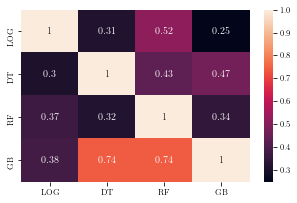

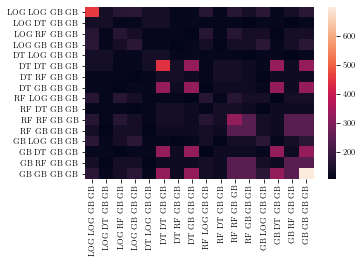

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

  0%|          | 0/500 [00:00<?, ?it/s]

250


100%|██████████| 500/500 [00:00<00:00, 1301.09it/s]


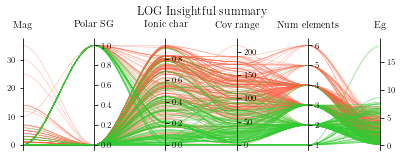

  0%|          | 0/500 [00:00<?, ?it/s]

250


100%|██████████| 500/500 [00:00<00:00, 1185.86it/s]


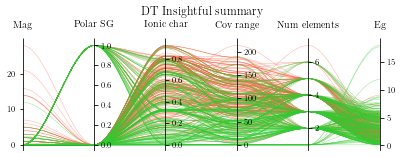

  0%|          | 0/500 [00:00<?, ?it/s]

250


100%|██████████| 500/500 [00:00<00:00, 1196.41it/s]


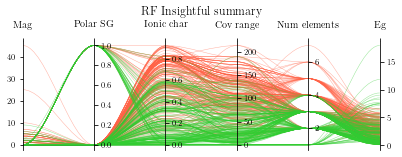

  0%|          | 0/500 [00:00<?, ?it/s]

250


100%|██████████| 500/500 [00:00<00:00, 1330.48it/s]


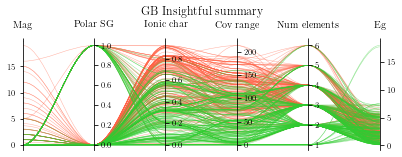

In [19]:
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)